In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import cartopy.crs as ccrs

from great_circle_distance import distance_on_unit_sphere

In [2]:
virus_spots = pandas.read_json('./prepared_countries.json')
virus_spots

,headline,city,country,country_code,latitude,longitude
0,Zika Outbreak Hits Miami,Miami,United States,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,United States,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,United States,US,25.79065,-80.13005
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,BR,-8.05389,-34.88111
4,Dallas man comes down with case of Zika,Dallas,United States,US,32.78306,-96.80667
...,...,...,...,...,...,...
601,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel,IL,31.76904,35.21633
602,More Zika patients reported in Indang,Indang,Philippines,PH,14.19528,120.87694
603,Suva authorities confirmed the spread of Rotav...,Suva,Fiji,FJ,-18.14161,178.44149
604,More Zika patients reported in Bella Vista,Bella Vista,Argentina,AR,-27.03424,-65.30196


## Splitting US and the rest of the world

In [3]:
us_data = virus_spots.loc[virus_spots['country_code'] == 'US']
rest_of_the_world_data = virus_spots.loc[virus_spots['country_code'] != 'US']

print(f'Total location points: {len(virus_spots)}')
print(f'US location points: {len(us_data)}')
print(f'The rest of the world location points: {len(rest_of_the_world_data)}')

us_data

Total location points: 606
US location points: 268
The rest of the world location points: 338


,headline,city,country,country_code,latitude,longitude
0,Zika Outbreak Hits Miami,Miami,United States,US,25.77427,-80.19366
1,Could Zika Reach New York City?,New York City,United States,US,40.71427,-74.00597
2,First Case of Zika in Miami Beach,Miami Beach,United States,US,25.79065,-80.13005
4,Dallas man comes down with case of Zika,Dallas,United States,US,32.78306,-96.80667
6,Zika Concerns are Spreading in Houston,Houston,United States,US,29.76328,-95.36327
...,...,...,...,...,...,...
593,Dengue Outbreak in Easton,Easton,United States,US,38.77428,-76.07633
596,Authorities are Worried about the Spread of Va...,Clovis,United States,US,36.82523,-119.70292
597,More Zika patients reported in Fort Worth,Fort Worth,United States,US,32.72541,-97.32085
598,Zika symptoms spotted in Boynton Beach,Boynton Beach,United States,US,26.52535,-80.06643


In [4]:
rest_of_the_world_data

,headline,city,country,country_code,latitude,longitude
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,BR,-8.05389,-34.88111
5,Trinidad confirms first Zika case,Trinidad,Bolivia,BO,-14.83333,-64.90000
7,Geneve Scientists Battle to Find Cure,Genève,Switzerland,CH,46.20222,6.14569
9,Zika Infested Monkeys in Sao Paulo,São Paulo,Brazil,BR,-23.54750,-46.63611
12,San Juan reports 1st U.S. Zika-related death a...,San Juan,Argentina,AR,-31.53750,-68.53639
...,...,...,...,...,...,...
600,Influenza Exposure in Muscat,Muscat,Oman,OM,23.58413,58.40778
601,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel,IL,31.76904,35.21633
602,More Zika patients reported in Indang,Indang,Philippines,PH,14.19528,120.87694
603,Suva authorities confirmed the spread of Rotav...,Suva,Fiji,FJ,-18.14161,178.44149


### Common function

In [5]:
def recluster(data: pandas.DataFrame, epsilon: int=800, min_points: int=4) -> None:
    locations = data.iloc[:, 4:].values.tolist()
    cluster_model = DBSCAN(eps=epsilon, min_samples=min_points, metric=distance_on_unit_sphere)
    dbscan_model = cluster_model.fit_predict(locations)
    data['cluster'] = list(dbscan_model)
    return


def draw_map(data: pandas.DataFrame):
    plt.figure(figsize=(100, 50))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()

    for cluster_id, df_cluster in data.groupby('cluster'):
        plt.scatter(
            df_cluster.longitude, 
            df_cluster.latitude, 
            linewidths=20, transform=ccrs.Geodetic(), marker="o", label=f'Cluster: {cluster_id}')
        
    plt.show()
    

## US re-clustering

<ipython-input-5-a1a616b71f13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = list(dbscan_model)


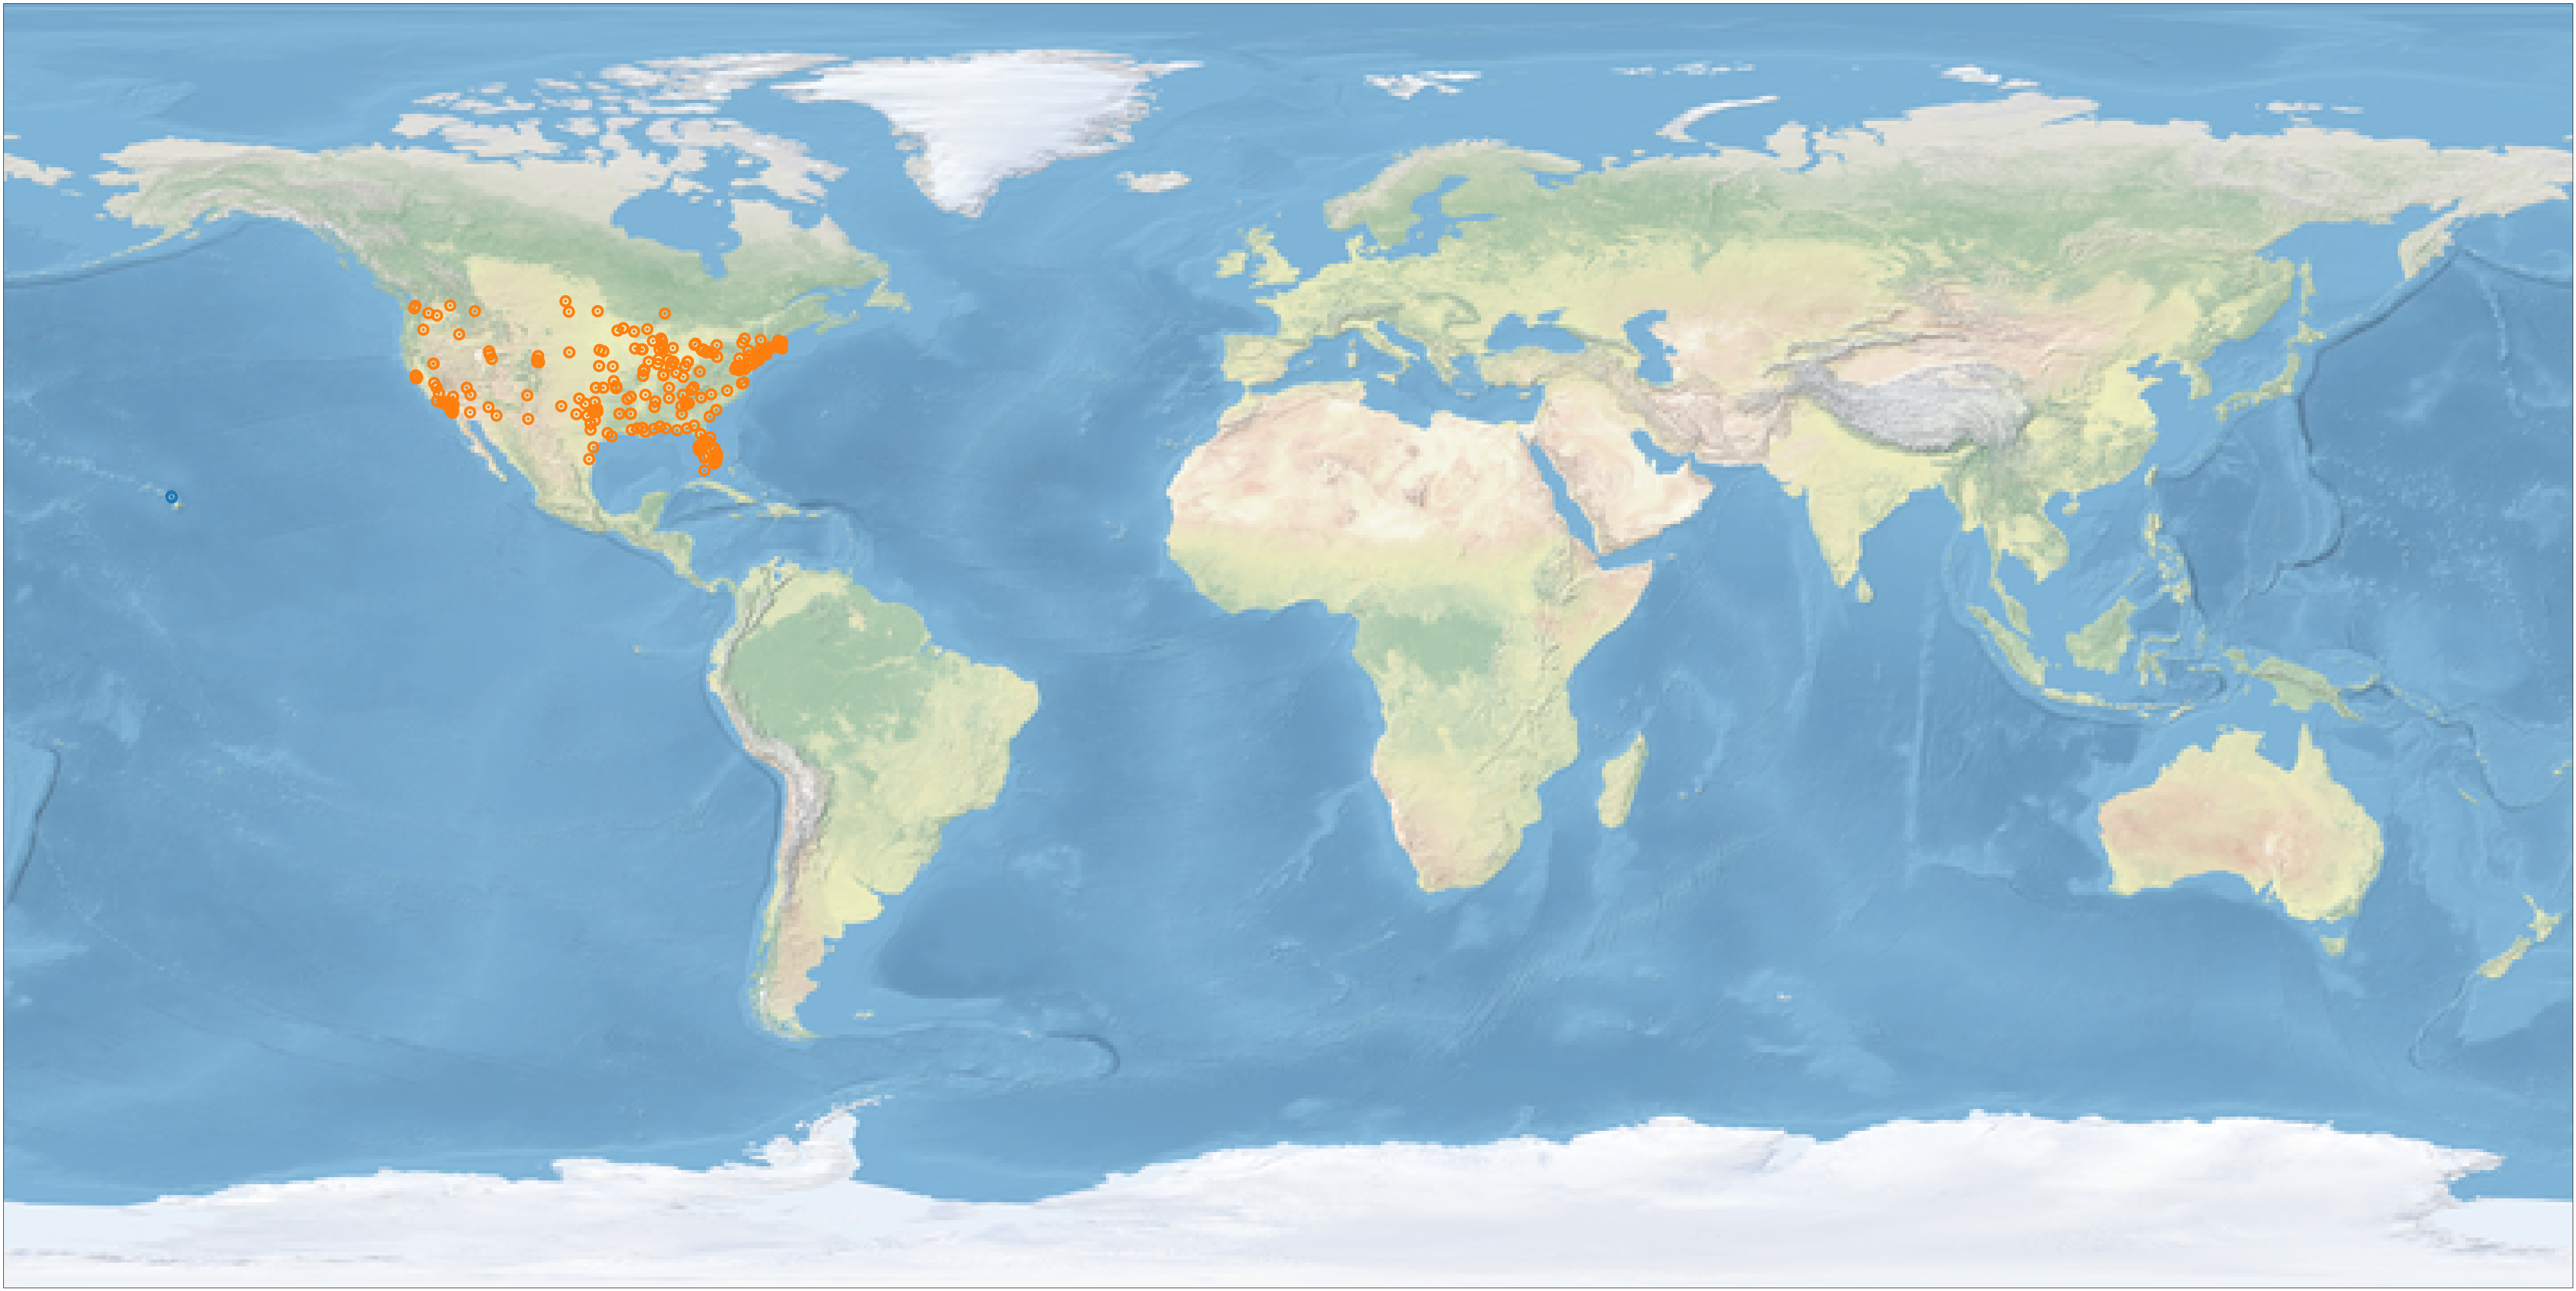

,headline,city,country,country_code,latitude,longitude,cluster
0,Zika Outbreak Hits Miami,Miami,United States,US,25.77427,-80.19366,0
1,Could Zika Reach New York City?,New York City,United States,US,40.71427,-74.00597,0
2,First Case of Zika in Miami Beach,Miami Beach,United States,US,25.79065,-80.13005,0
4,Dallas man comes down with case of Zika,Dallas,United States,US,32.78306,-96.80667,0
6,Zika Concerns are Spreading in Houston,Houston,United States,US,29.76328,-95.36327,0
...,...,...,...,...,...,...,...
593,Dengue Outbreak in Easton,Easton,United States,US,38.77428,-76.07633,0
596,Authorities are Worried about the Spread of Va...,Clovis,United States,US,36.82523,-119.70292,0
597,More Zika patients reported in Fort Worth,Fort Worth,United States,US,32.72541,-97.32085,0
598,Zika symptoms spotted in Boynton Beach,Boynton Beach,United States,US,26.52535,-80.06643,0


In [6]:
eps=800
m_points=4

recluster(data=us_data)
draw_map(data=us_data)
us_data

## The rest of the worlds re-clustering

<ipython-input-5-a1a616b71f13>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = list(dbscan_model)


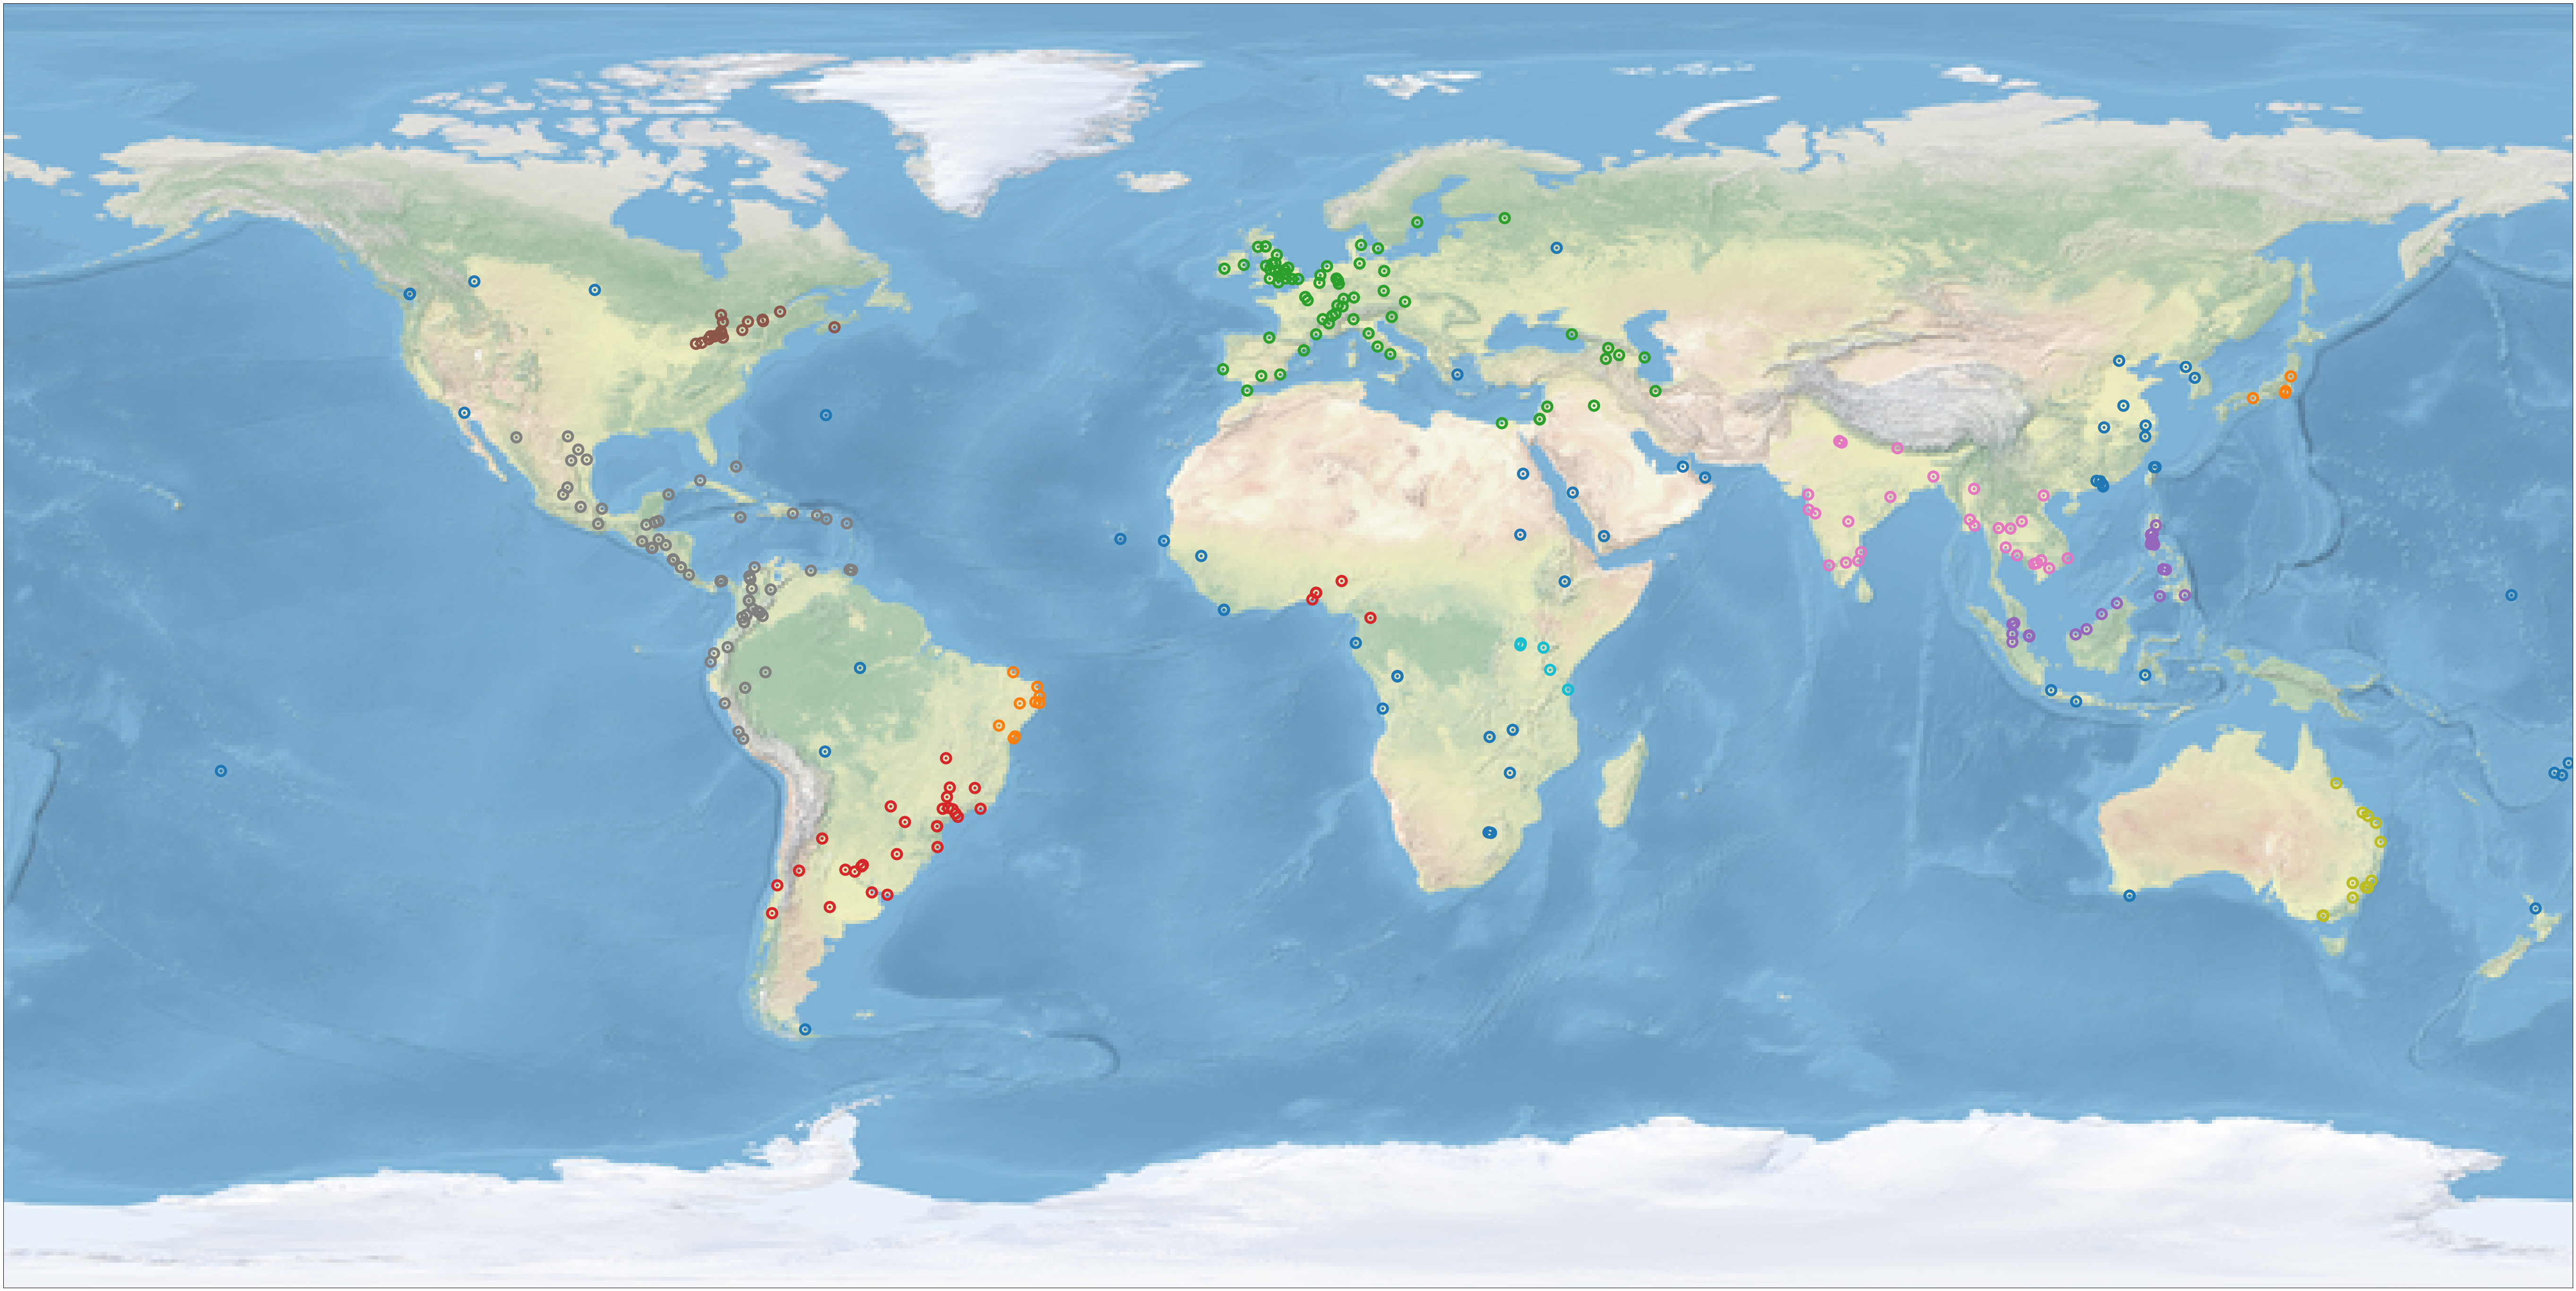

,headline,city,country,country_code,latitude,longitude,cluster
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Brazil,BR,-8.05389,-34.88111,0
5,Trinidad confirms first Zika case,Trinidad,Bolivia,BO,-14.83333,-64.90000,-1
7,Geneve Scientists Battle to Find Cure,Genève,Switzerland,CH,46.20222,6.14569,1
9,Zika Infested Monkeys in Sao Paulo,São Paulo,Brazil,BR,-23.54750,-46.63611,2
12,San Juan reports 1st U.S. Zika-related death a...,San Juan,Argentina,AR,-31.53750,-68.53639,2
...,...,...,...,...,...,...,...
600,Influenza Exposure in Muscat,Muscat,Oman,OM,23.58413,58.40778,-1
601,Rumors about Rabies spreading in Jerusalem hav...,Jerusalem,Israel,IL,31.76904,35.21633,11
602,More Zika patients reported in Indang,Indang,Philippines,PH,14.19528,120.87694,3
603,Suva authorities confirmed the spread of Rotav...,Suva,Fiji,FJ,-18.14161,178.44149,-1


In [7]:
recluster(data=rest_of_the_world_data)
draw_map(data=rest_of_the_world_data)
rest_of_the_world_data

## Sorting US by headline 

In [11]:
us_data = us_data.sort_values('headline')
us_data

,headline,city,country,country_code,latitude,longitude,cluster
575,Alameda Residents Recieve Rabies vaccine,Alameda,United States,US,37.76521,-122.24164,0
433,Arvada is infested with Syphilis,Arvada,United States,US,39.80276,-105.08748,0
503,Authorities a Miami,Miami,United States,US,25.77427,-80.19366,0
69,Authorities are Worried about the Spread of Br...,Silver Spring,United States,US,38.99067,-77.02609,0
477,Authorities are Worried about the Spread of Ch...,Hemet,United States,US,33.74761,-116.97307,0
...,...,...,...,...,...,...,...
49,Zika symtomps spotted in Key West,Key West,United States,US,24.55524,-81.78163,0
464,Zika virus case reported in Rockland,Rockland,United States,US,42.13066,-70.91616,0
133,Zika virus confirmed in Westchester,Westchester,United States,US,25.75482,-80.32727,0
40,Zika virus reported in Cleveland,Cleveland,United States,US,35.15952,-84.87661,0


In [19]:
result = us_data[us_data['headline'].duplicated() == True]
result

,headline,city,country,country_code,latitude,longitude,cluster


## Sorting the rest by headline 

In [13]:
rest_of_the_world_data = rest_of_the_world_data.sort_values('headline')
rest_of_the_world_data

,headline,city,country,country_code,latitude,longitude,cluster
45,18 new Zika Cases in Bogota,Bogotá,Colombia,CO,4.60971,-74.08175,6
125,19 new Zika Cases in Sengkang,Sengkang,Indonesia,ID,-4.12790,120.02970,-1
256,Albany Residents Recieve Respiratory Syncytial...,Albany,Australia,AU,-35.02692,117.88369,-1
92,Antipolo under threat from Zika Virus,Antipolo,Philippines,PH,14.62578,121.12251,3
159,Arhus is infested with Bronchitis,Århus,Denmark,DK,56.15674,10.21076,1
...,...,...,...,...,...,...,...
451,Zika symptoms spotted in Quito,Quito,Ecuador,EC,-0.22985,-78.52495,6
413,Zika symptoms spotted in Sibu,Sibu,Malaysia,MY,2.30000,111.81667,3
323,Zika symptoms spotted in Surat,Sūrat,India,IN,21.19594,72.83023,5
39,Zika worries in San Salvador,San Salvador,El Salvador,SV,13.68935,-89.18718,6


In [18]:
result = rest_of_the_world_data[rest_of_the_world_data['headline'].duplicated() == True]
result

,headline,city,country,country_code,latitude,longitude,cluster
